In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('C:/Users/Ehsan-admin/Documents/Spring 2021/weatherAUS.csv')

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df = df.drop("Date",axis = 1)

## Visualization & Analysis

In [8]:
plt.style.use("fivethirtyeight")

In [9]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

<ipython-input-10-981d79146363>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_list[i].set_xticklabels(list(dict_data.keys()), rotation=90)


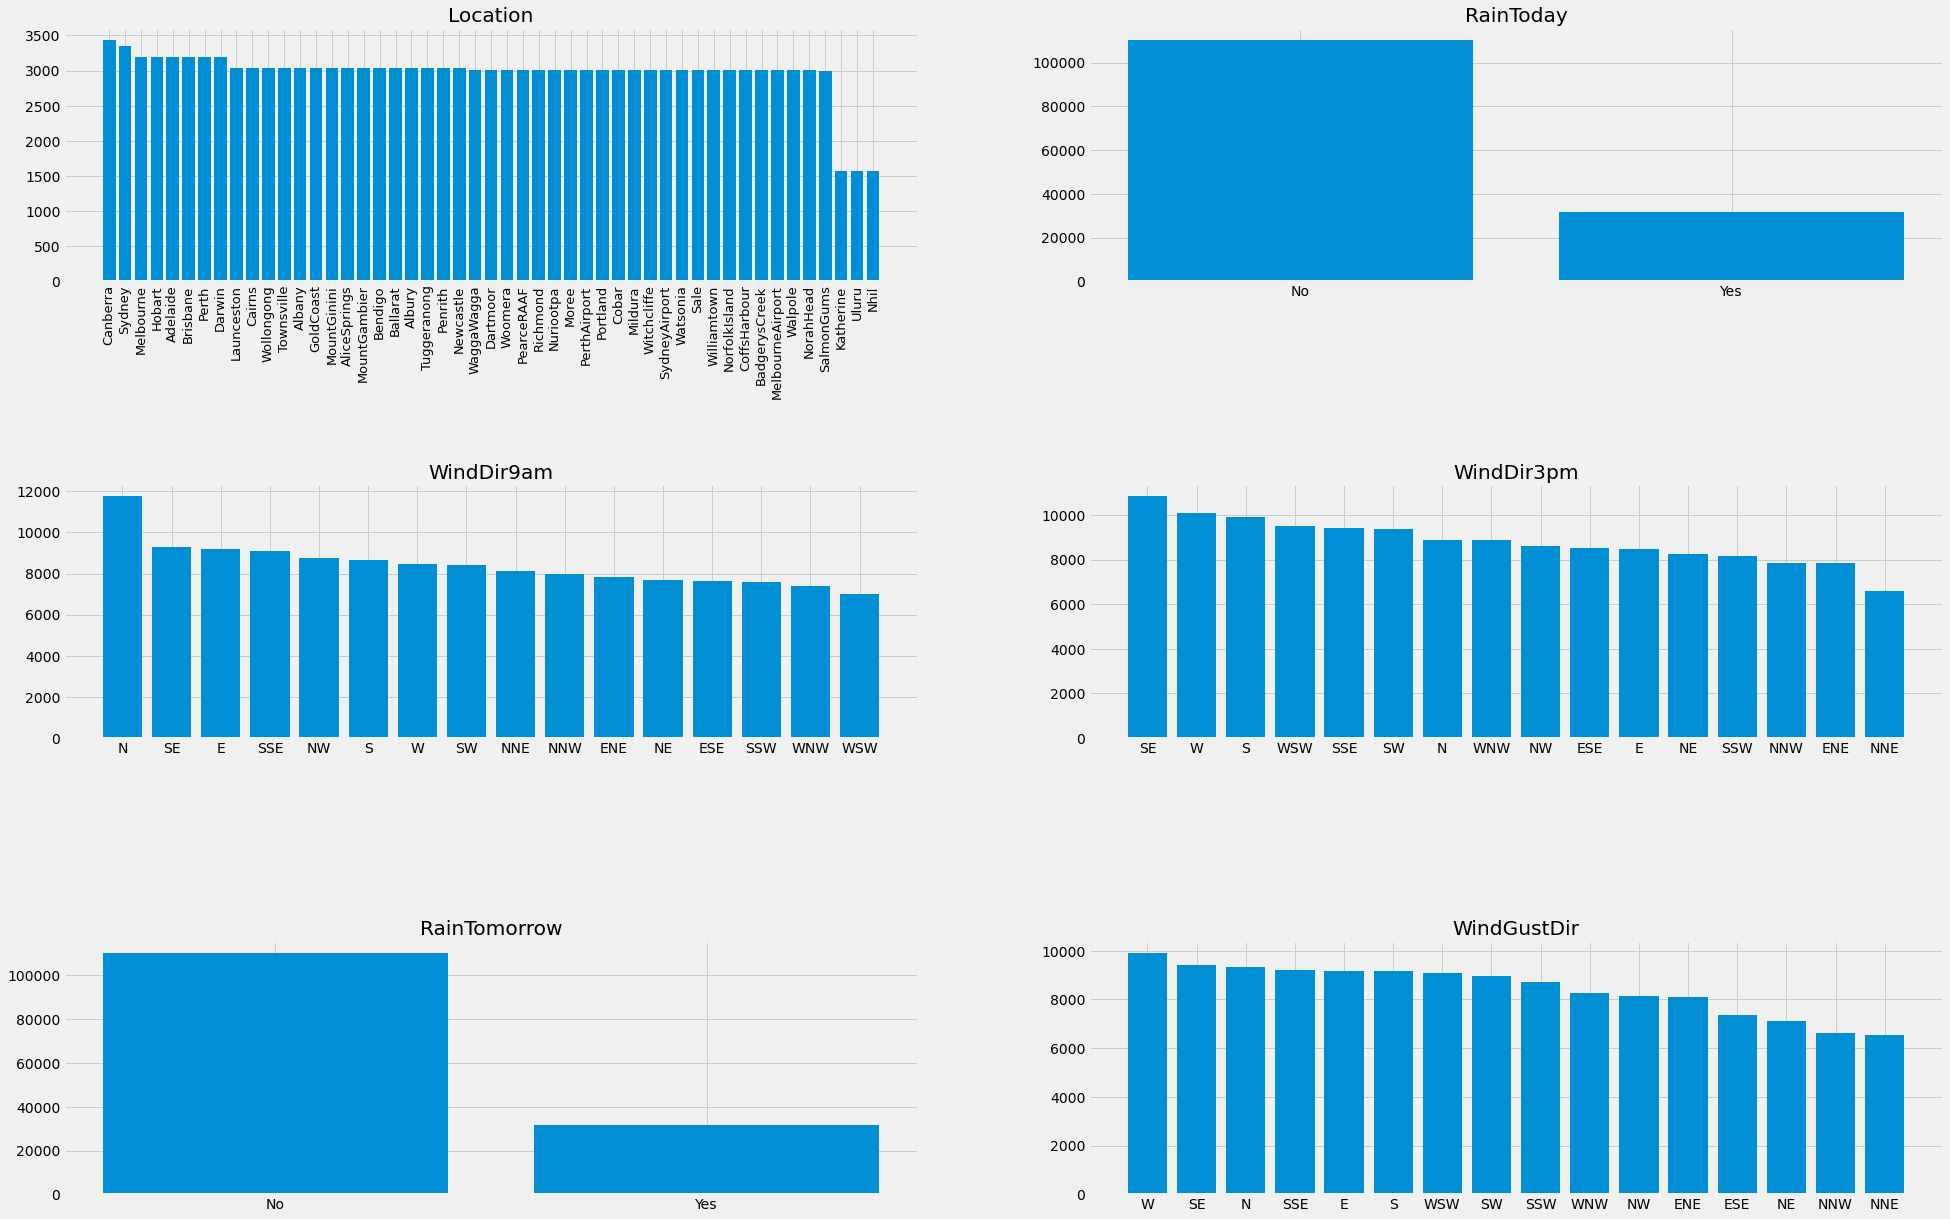

In [10]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20)) 
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]
i=0
for col in cat_cols :
    dict_data = df[col].value_counts().to_dict()
    ax_list[i].bar(list(dict_data.keys()),list(dict_data.values()))
    
    if col=="Location":
        ax_list[i].set_xticklabels(list(dict_data.keys()), rotation=90)
        ax_list[i].tick_params(axis='x', which='major', labelsize=13)

    ax_list[i].set_title(col)
    i+=1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
plt.show()

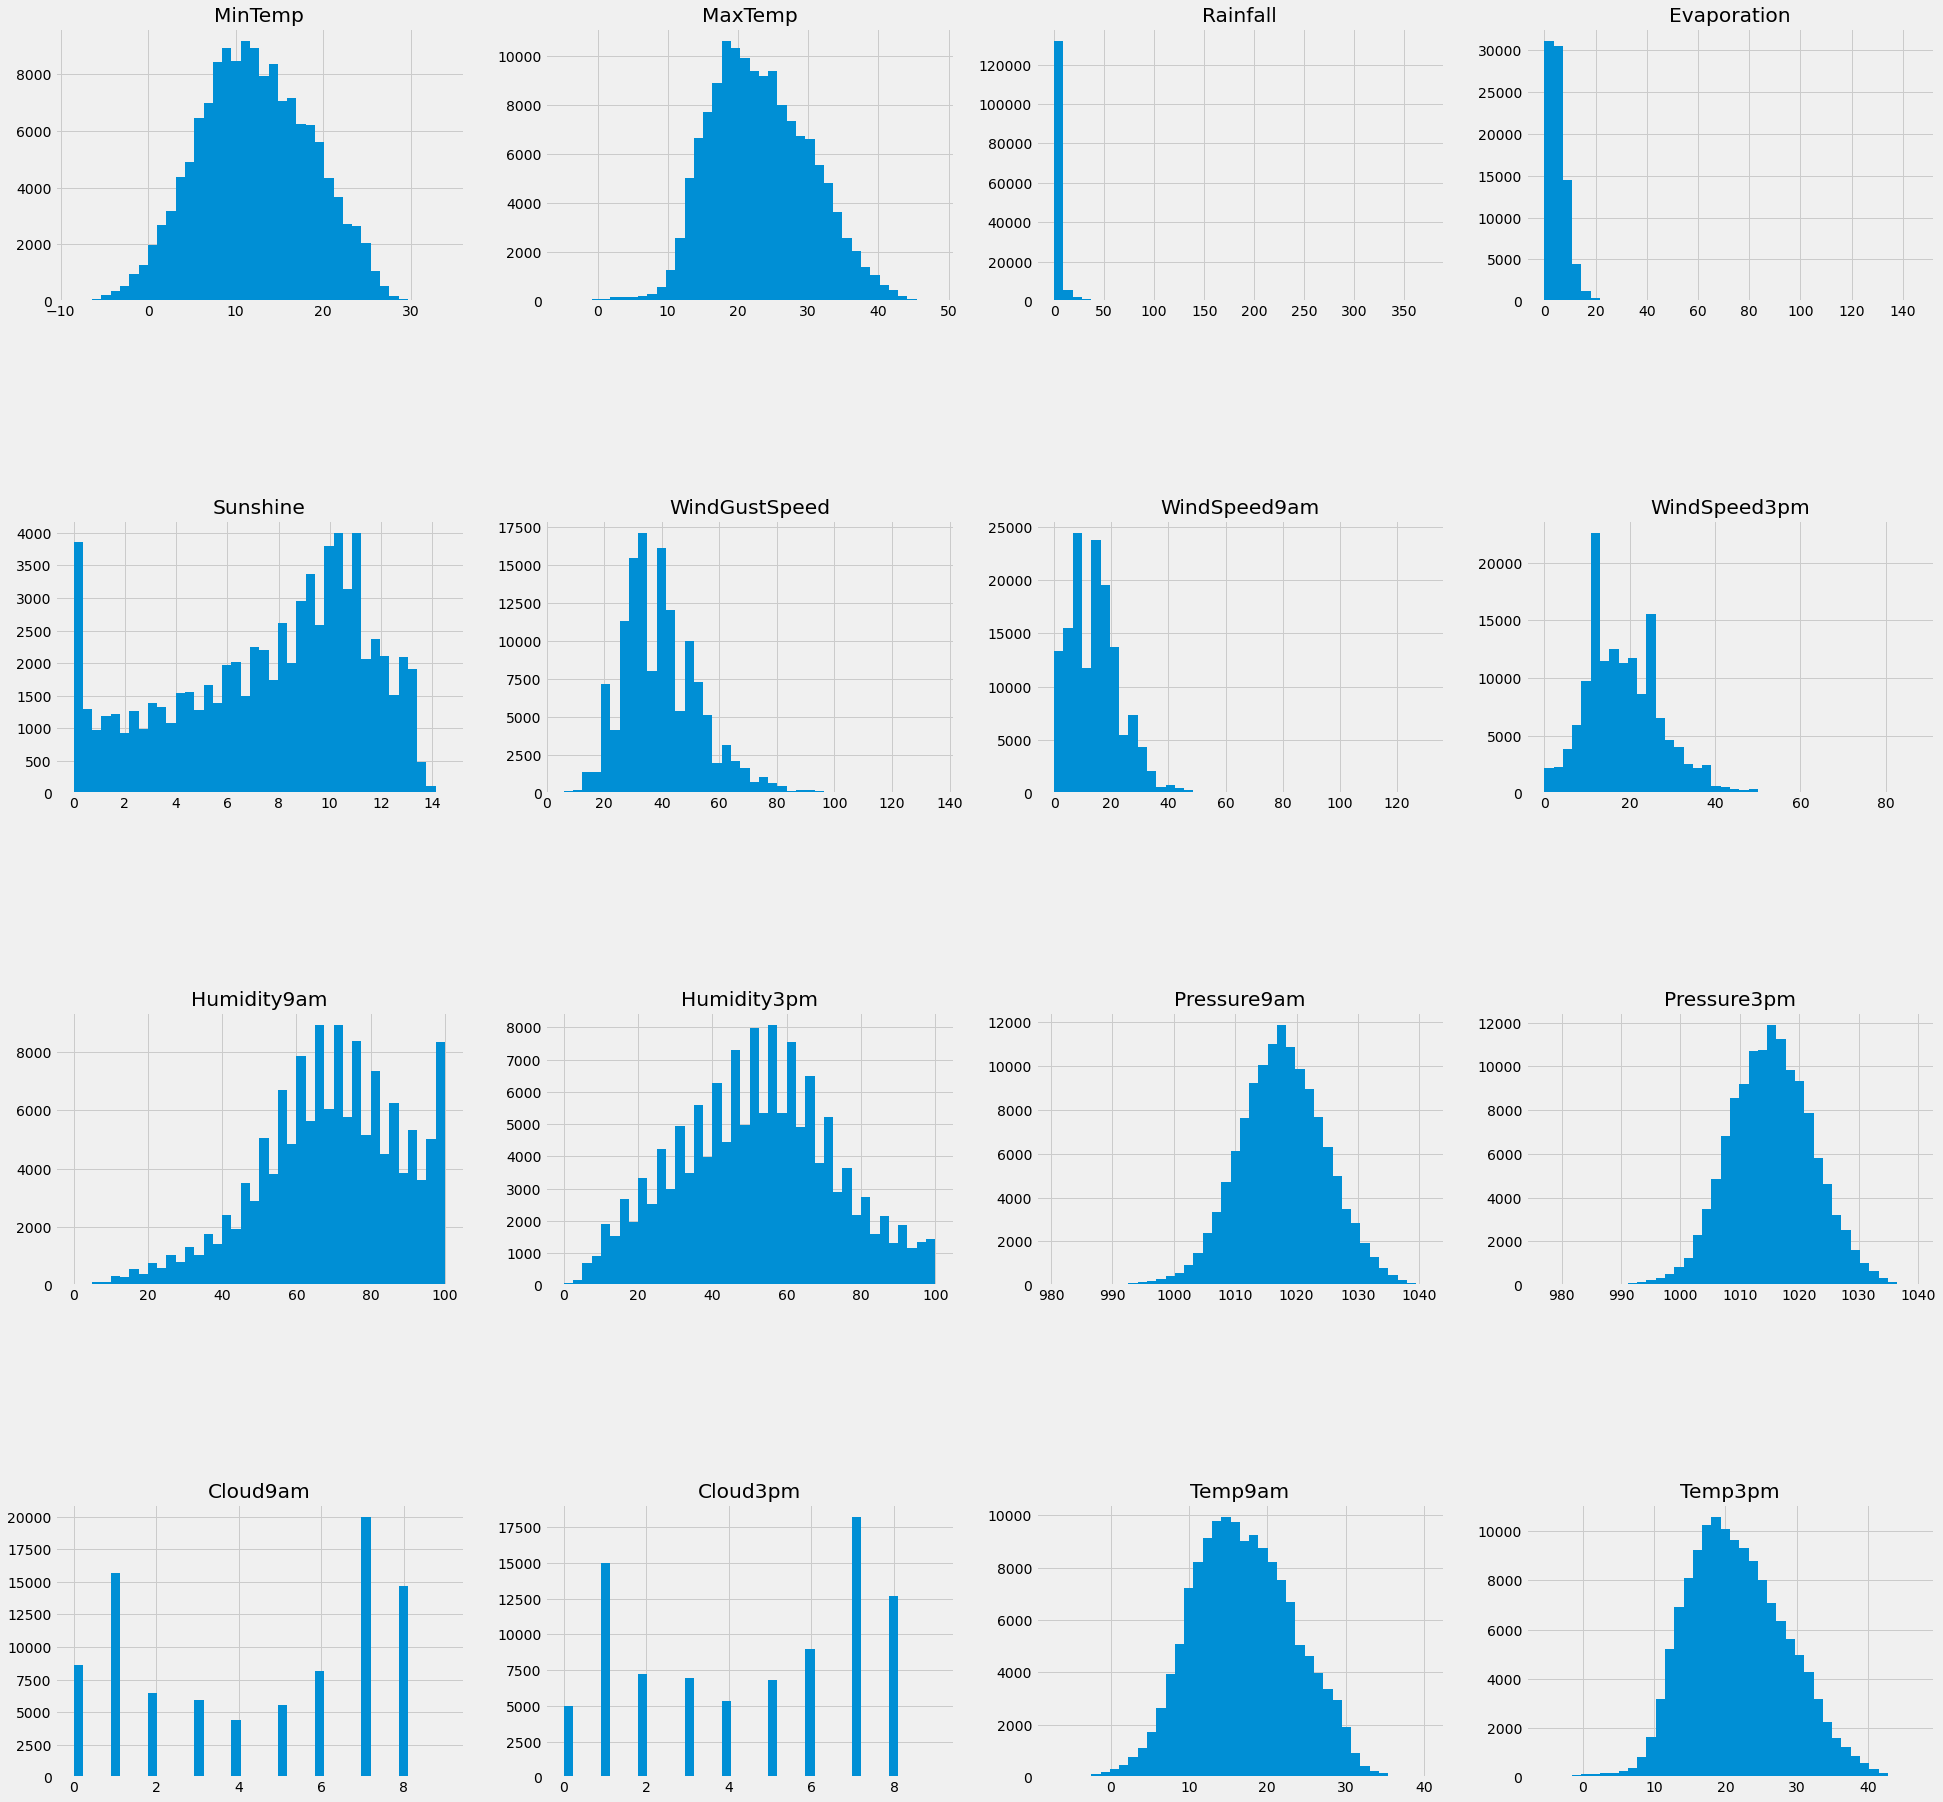

In [11]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4,4,figsize=(30,30)) 
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]
i=0
for col in num_cols :
    
    df[col].astype("float").hist(bins= 40,ax =ax_list[i])
    ax_list[i].set_title(col)
    i+=1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
plt.show()

In [12]:
df_rain = df.loc[df["RainTomorrow"]=="Yes"]
df_no_rain = df.loc[df["RainTomorrow"]=="No"]

<ipython-input-13-ac2f89cb979c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_list[i].set_xticklabels(list(dict_data_no_rain.keys()), rotation=90)
<ipython-input-13-ac2f89cb979c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_list[i].set_xticklabels(list(dict_data_no_rain.keys()))


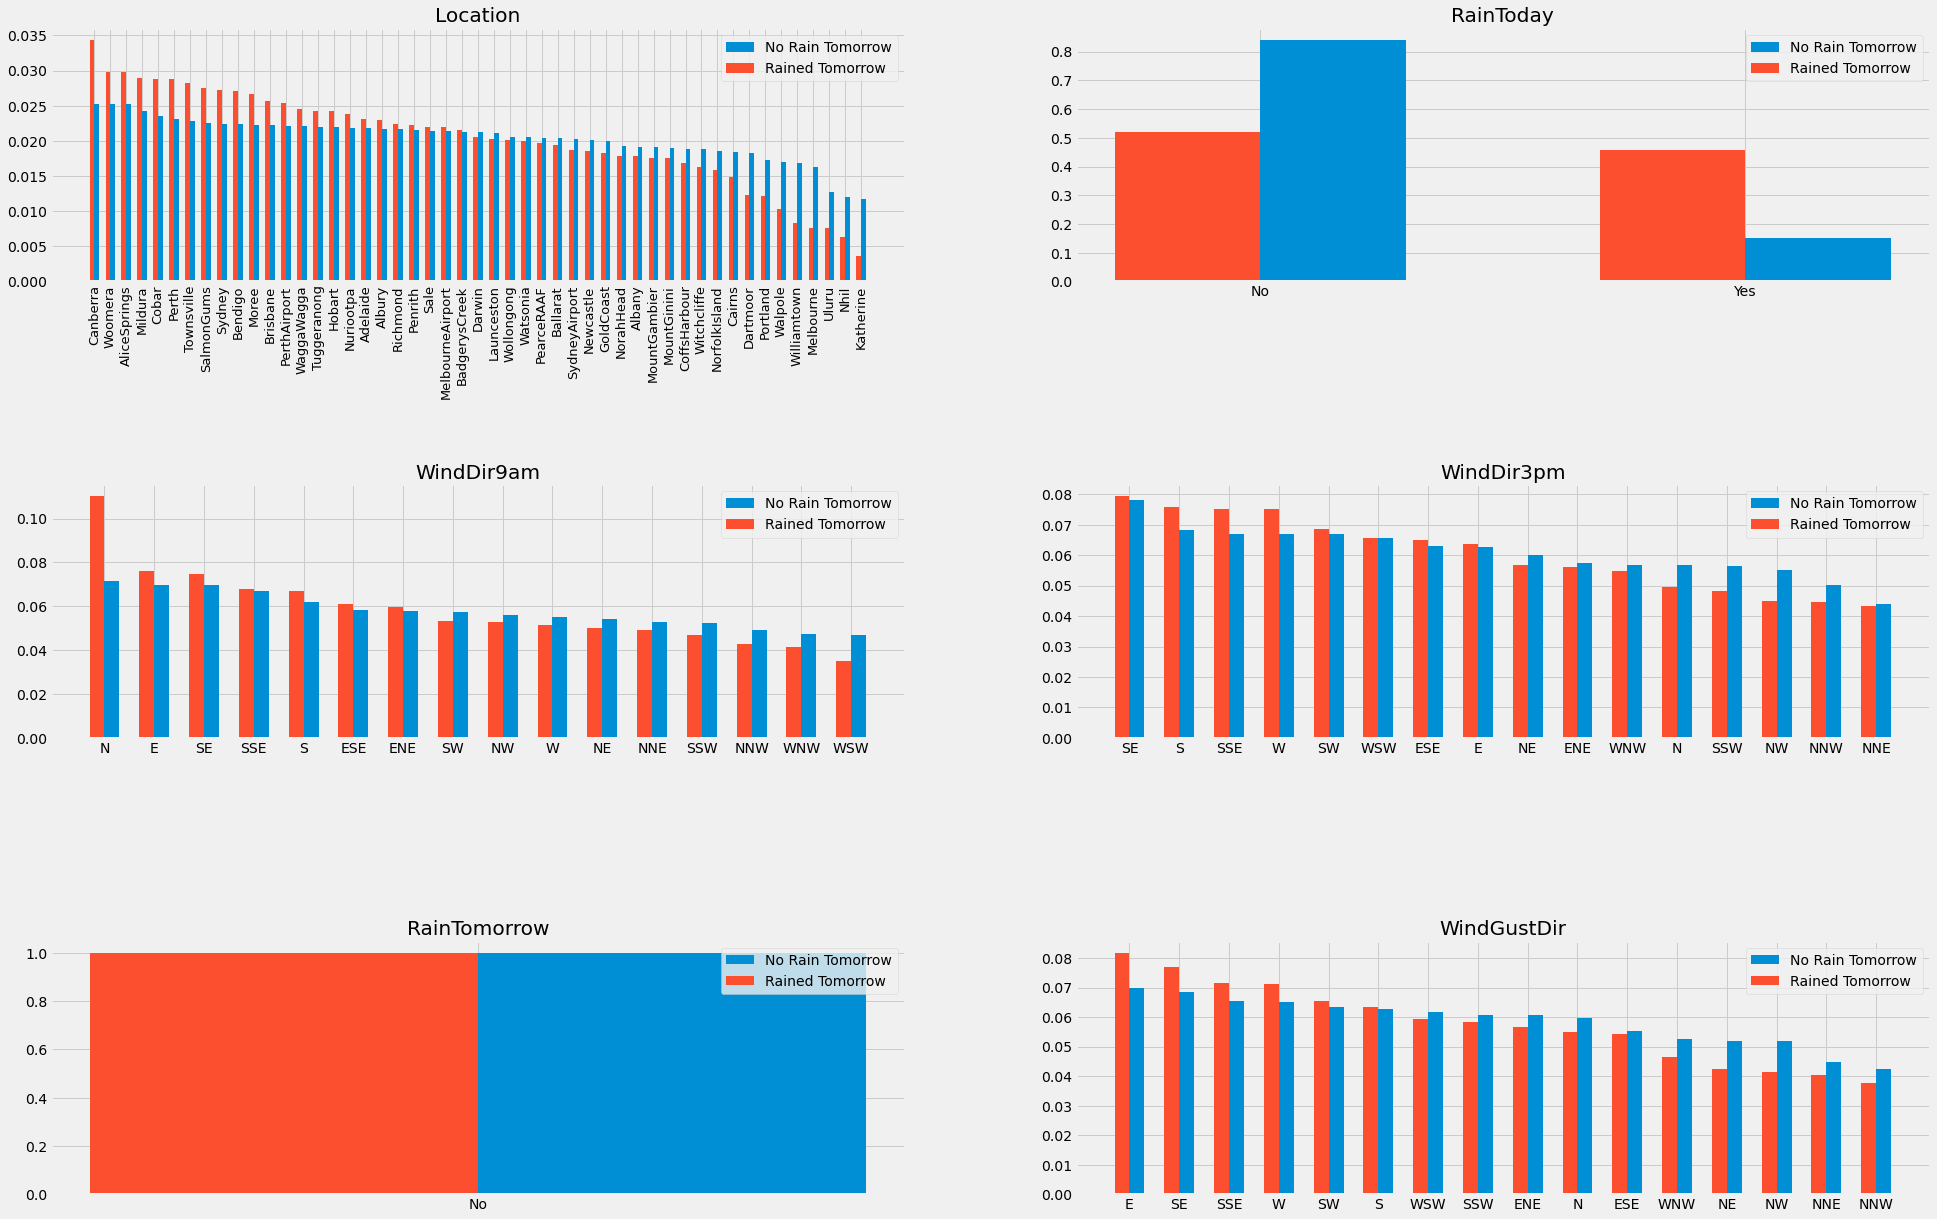

In [13]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20)) 
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]
i=0
num_rain = len(df_rain.index)
num_no_rain= len(df_no_rain.index)
for col in cat_cols :
    dict_data_rain = df_rain[col].value_counts().to_dict()
    value_rain = list(dict_data_rain.values())
    
    dict_data_no_rain = df_no_rain[col].value_counts().to_dict()
    value_no_rain = list(dict_data_no_rain.values())
    
    x=np.arange(len(list(dict_data_no_rain.keys())))
    
    ax_list[i].bar(x + 0.3, [x / num_no_rain  for x in value_no_rain],width=0.3, label="No Rain Tomorrow")
    ax_list[i].bar(x, [x / num_rain  for x in value_rain],width=0.3,label="Rained Tomorrow")
    if col=="Location":
        ax_list[i].set_xticklabels(list(dict_data_no_rain.keys()), rotation=90)
        ax_list[i].tick_params(axis='x', which='major', labelsize=13)

    ax_list[i].set_title(col)
    ax_list[i].set_xticklabels(list(dict_data_no_rain.keys()))
    ax_list[i].set_xticks(x+0.15)
    ax_list[i].legend()
    i+=1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
plt.show()

In [14]:
df_no_rain_sample = df_no_rain.sample(n=5000)
df_rain_sample = df_rain.sample(n=5000)

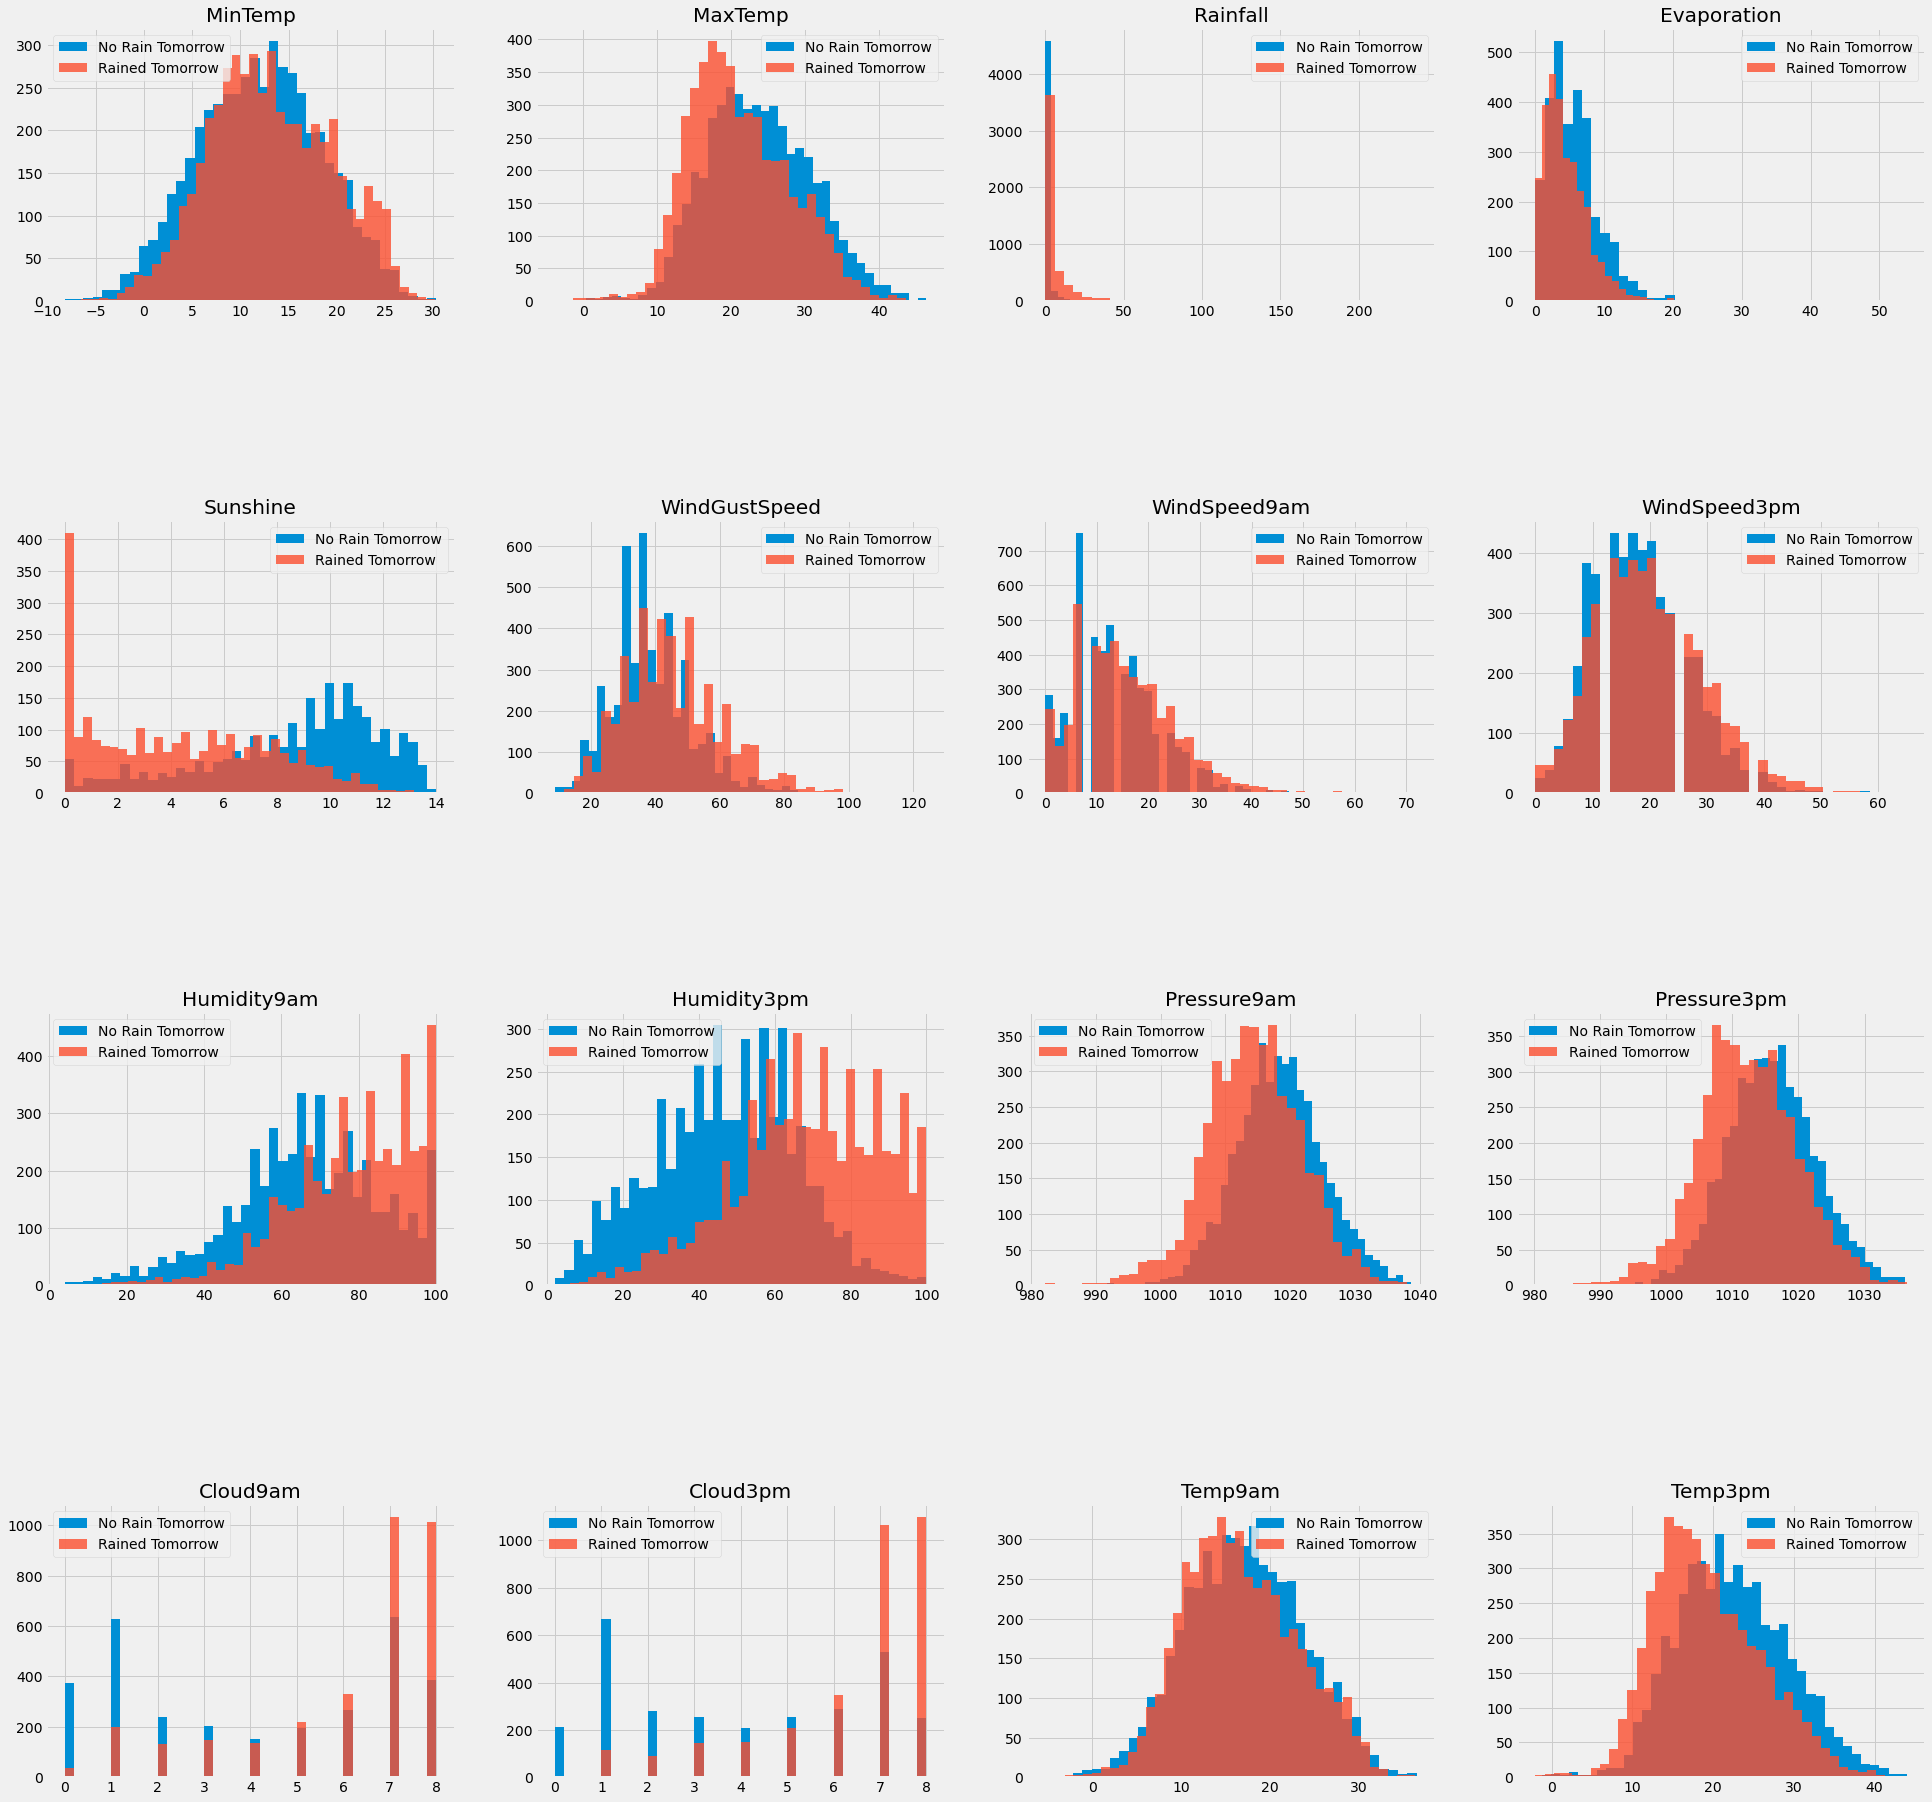

In [15]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4,4,figsize=(30,30)) 
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]
i=0
for col in num_cols :
    
    df_no_rain_sample[col].astype("float").hist(bins= 40,ax =ax_list[i],label = "No Rain Tomorrow")
    df_rain_sample[col].astype("float").hist(bins= 40,ax =ax_list[i],alpha = 0.8,label = "Rained Tomorrow")
    ax_list[i].set_title(col)
    ax_list[i].legend()
    i+=1
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)
plt.show()

In [16]:
df.shape

(145460, 22)

Text(0.5, 1.0, 'type of our data ')

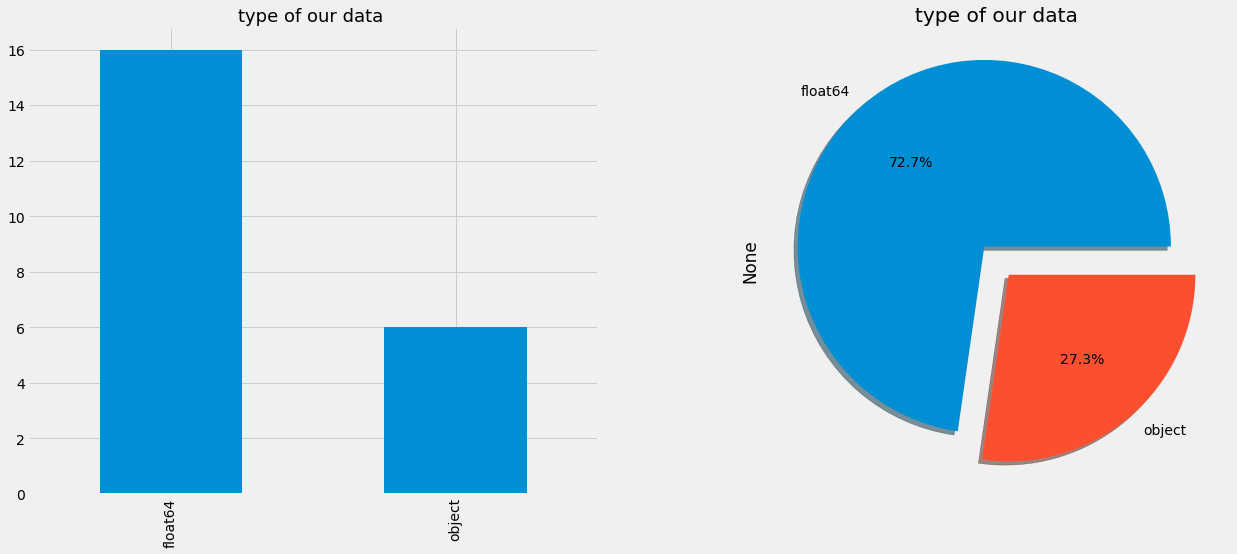

In [17]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

## “RainToday” and “RainTomorrow” are objects (Yes / No). I will convert them to binary (1/0) for our convenience.

In [18]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

## Now, I will now check the missing data model in the dataset:

In [20]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object
WindDir3pm,4228,2.906641,object
